<a href="https://colab.research.google.com/github/anamariacuciuc/bigdata/blob/master/03_DLR_python_visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DLR-Identifying spatial and temporal dynamics in bicyle incidence

---







## 1. DATA PREPARATION

In [0]:
import pandas as pd
import numpy as np

import seaborn as sns

sns.set()

In [12]:
import pandas
data = pandas.read_csv('incident_weather_merged.csv')
data.head()

,Unnamed: 0,Unnamed: 0.1,OBJECTID,ULAND,UREGBEZ,UKREIS,UGEMEINDE,UJAHR,UMONAT,USTUNDE,UWOCHENTAG,UKATEGORIE,UART,UTYP,IstRad,IstPKW,IstFuss,IstKrad,IstSonstige,LICHT,STRZUSTAND,LINREFX,LINREFY,DATUM,closest_station_lat,closest_station_lon,closest_station_distance,STATIONS_ID,mean_wind_speed,mean_wind_direction,temperature,rel_humidity,total_cloud_cover,precipitation_height,pressure_station,sunshine_duration,visibility
0,0,0,3,1.0,0.0,2.0,0.0,2016.0,7.0,21.0,3,3,6,7,1.0,0.0,1.0,0.0,0.0,0,NaN,10.150667,54.333961,2016-07-03 21:00:00,54.1654,10.3519,22.892874,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,4,1.0,0.0,2.0,0.0,2016.0,4.0,16.0,7,3,6,7,1.0,0.0,1.0,0.0,0.0,0,NaN,10.116325,54.304795,2016-04-07 16:00:00,54.1654,10.3519,21.833437,6163.0,6.6,220.0,7.5,77.0,0.0,0.2,1003.1,16.0,24100.0
2,2,2,5,1.0,0.0,2.0,0.0,2016.0,9.0,15.0,5,3,4,6,1.0,0.0,0.0,0.0,0.0,0,NaN,10.122730,54.320007,2016-09-05 15:00:00,54.1654,10.3519,22.789730,6163.0,3.7,40.0,19.7,61.0,1.0,0.0,1016.9,54.0,65460.0
3,3,3,6,1.0,0.0,2.0,0.0,2016.0,10.0,6.0,3,2,5,3,1.0,1.0,0.0,0.0,0.0,2,NaN,10.133636,54.338040,2016-10-03 06:00:00,54.1654,10.3519,23.909426,6163.0,1.5,280.0,9.0,98.0,7.0,0.0,1016.3,0.0,4470.0
4,4,4,9,1.0,0.0,2.0,0.0,2016.0,8.0,22.0,5,3,0,7,1.0,0.0,0.0,0.0,0.0,2,NaN,10.152390,54.346308,2016-08-05 22:00:00,54.1654,10.3519,23.969997,6163.0,2.8,250.0,14.9,90.0,0.0,0.0,1015.2,NaN,22390.0


In [0]:
#Drop columns Unnamed: 0 and Unnamed: 0.1
data = data.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)

In [14]:
#Change UJAHR format
data['UJAHR'] = data['UJAHR'].astype(np.uint64)
data['UMONAT'] = data['UMONAT'].astype(np.uint64)
data['USTUNDE'] = data['USTUNDE'].astype(np.uint64)

data.head()

,OBJECTID,ULAND,UREGBEZ,UKREIS,UGEMEINDE,UJAHR,UMONAT,USTUNDE,UWOCHENTAG,UKATEGORIE,UART,UTYP,IstRad,IstPKW,IstFuss,IstKrad,IstSonstige,LICHT,STRZUSTAND,LINREFX,LINREFY,DATUM,closest_station_lat,closest_station_lon,closest_station_distance,STATIONS_ID,mean_wind_speed,mean_wind_direction,temperature,rel_humidity,total_cloud_cover,precipitation_height,pressure_station,sunshine_duration,visibility
0,3,1.0,0.0,2.0,0.0,2016,7,21,3,3,6,7,1.0,0.0,1.0,0.0,0.0,0,NaN,10.150667,54.333961,2016-07-03 21:00:00,54.1654,10.3519,22.892874,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,1.0,0.0,2.0,0.0,2016,4,16,7,3,6,7,1.0,0.0,1.0,0.0,0.0,0,NaN,10.116325,54.304795,2016-04-07 16:00:00,54.1654,10.3519,21.833437,6163.0,6.6,220.0,7.5,77.0,0.0,0.2,1003.1,16.0,24100.0
2,5,1.0,0.0,2.0,0.0,2016,9,15,5,3,4,6,1.0,0.0,0.0,0.0,0.0,0,NaN,10.122730,54.320007,2016-09-05 15:00:00,54.1654,10.3519,22.789730,6163.0,3.7,40.0,19.7,61.0,1.0,0.0,1016.9,54.0,65460.0
3,6,1.0,0.0,2.0,0.0,2016,10,6,3,2,5,3,1.0,1.0,0.0,0.0,0.0,2,NaN,10.133636,54.338040,2016-10-03 06:00:00,54.1654,10.3519,23.909426,6163.0,1.5,280.0,9.0,98.0,7.0,0.0,1016.3,0.0,4470.0
4,9,1.0,0.0,2.0,0.0,2016,8,22,5,3,0,7,1.0,0.0,0.0,0.0,0.0,2,NaN,10.152390,54.346308,2016-08-05 22:00:00,54.1654,10.3519,23.969997,6163.0,2.8,250.0,14.9,90.0,0.0,0.0,1015.2,NaN,22390.0


In [15]:
print('Records:', data.shape[0], '\nColumns:', data.shape[1])

Records: 81530 
Columns: 35


In [0]:
#2. Handling missing values 

In [17]:
data.shape

(81530, 35)

In [18]:
print('Proportion of Missing Values in Incidence Table:', 
      round(data.isna().sum().sum()/len(data),3), '%')

Proportion of Missing Values in Incidence Table: 0.729 %


In [19]:
data.isna().sum()

OBJECTID                        0
ULAND                           0
UREGBEZ                         0
UKREIS                          0
UGEMEINDE                       0
UJAHR                           0
UMONAT                          0
USTUNDE                         0
UWOCHENTAG                      0
UKATEGORIE                      0
UART                            0
UTYP                            0
IstRad                          0
IstPKW                          0
IstFuss                         0
IstKrad                         0
IstSonstige                     0
LICHT                           0
STRZUSTAND                  34029
LINREFX                         0
LINREFY                         0
DATUM                           0
closest_station_lat             0
closest_station_lon             0
closest_station_distance        0
STATIONS_ID                  2070
mean_wind_speed              2070
mean_wind_direction          2070
temperature                  2070
rel_humidity  

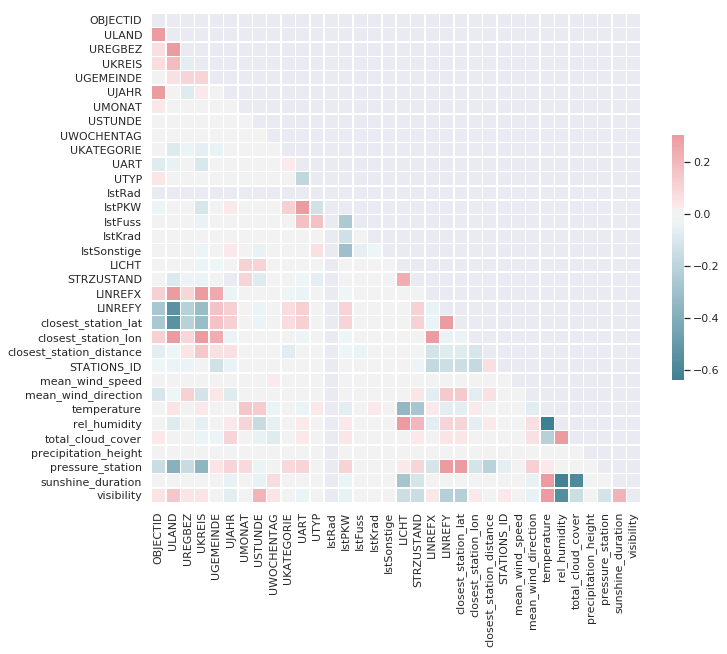

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
# Compute correlation matrix
data_corr = data.corr()

# Generate mask for the upper triangle
mask = np.zeros_like(data_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(data_corr, mask=mask, cmap=cmap, vmax=.3, center=0,

            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## **2. DESCRIPTIVE STATISTICS**



# A) Variations of incidence 
# Per Month

Text(0.5, 0, '1 - January ,  2 - February , 3 - March , 4 - April , 5 - May , 6 - June , 7 -July, 8 - August, 9- September, 10-October, 11-November, 12-December')

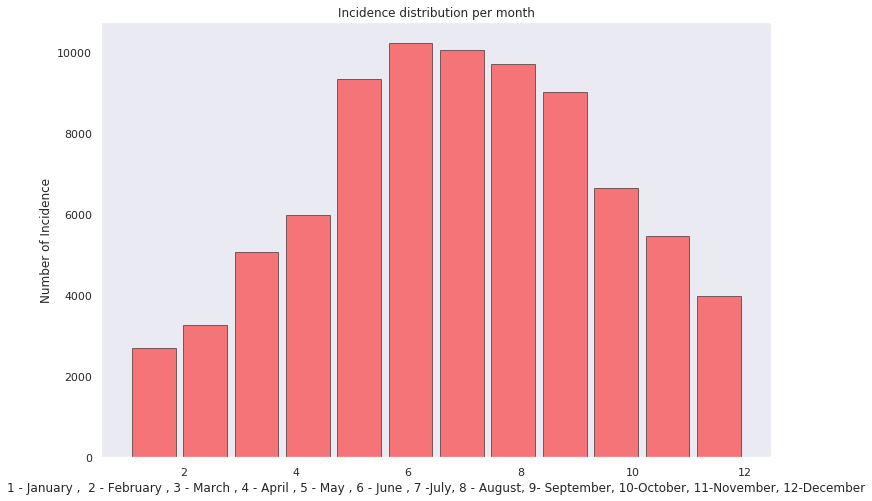

In [21]:
# Number of incidence per month

#acc_count = data.groupby(data.UMONAT).IstRad.count().plot(kind = 'bar')
plt.figure(figsize=(12,8))
data.UMONAT.hist(bins=12,rwidth=0.85,alpha=0.5, color= 'red', edgecolor='black')
plt.title('Incidence distribution per month' , fontsize= 12)
plt.grid(False)
plt.ylabel('Number of Incidence' , fontsize = 12)
plt.xlabel('1 - January ,  2 - February , 3 - March , 4 - April , 5 - May , 6 - June , 7 -July, 8 - August, 9- September, 10-October, 11-November, 12-December' , 
           fontsize = 12)


In [22]:
data_1 = pd.DataFrame(data.groupby(data.UJAHR).IstRad.count())
data_1.head()

,IstRad
UJAHR,
2016,34029
2017,47501


# Per Year

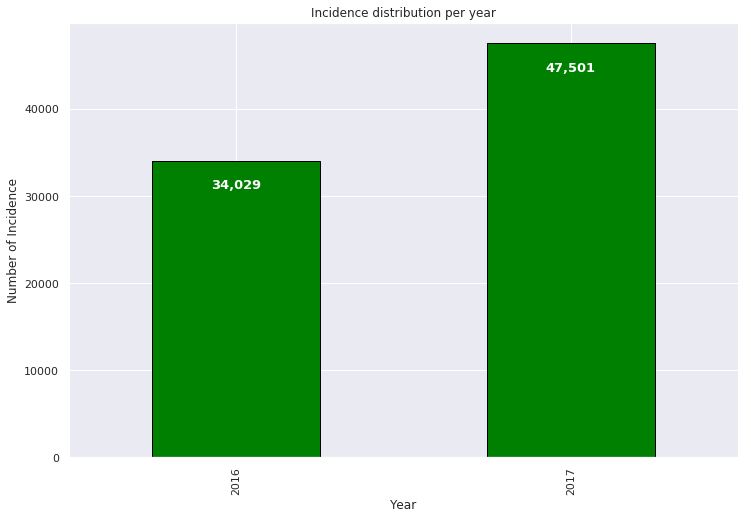

In [23]:
acc_count = data.groupby(data.UJAHR).IstRad.count().plot(kind = 'bar', figsize=(12,8), color='green', edgecolor='black')
plt.title('Incidence distribution per year' , fontsize= 12)
plt.ylabel('Number of Incidence' , fontsize = 12)
plt.xlabel('Year' , fontsize = 12)


# Add Data Labels for bar values
ax = acc_count.axes
for p in ax.patches:
    ax.annotate(s="{:,.0f}".format(p.get_height()), xy=((p.get_x() + p.get_width() / 2., p.get_height()-3000)),
                ha='center', va='center', color='white', xytext=(0, 2), 
                textcoords='offset points', weight='bold', fontsize=13)  
    


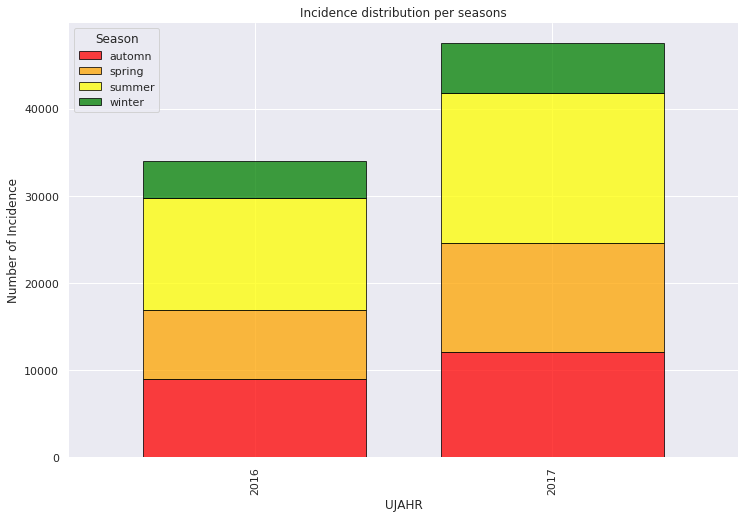

In [54]:
counts = data.groupby(['UJAHR', 'Season']).size()

#distribution of incidents per year, per season
counts = counts.rename_axis(['UJAHR', 'Season'])
counts = counts.rename_axis(['UJAHR', 'Season'])\
                                .unstack('Season')\
                                .rename({0:'', 1:'', 2:'', 3:''}, axis='columns')
counts
# prepare barplot
#fig, ax = plt.subplots(figsize=(12, 6))
colors= ["red", "orange","yellow", "green"]

# plot
counts.plot(kind='bar', stacked=True, color=colors, figsize=(12,8), width=0.75, align='center', linewidth=1, edgecolor='black', alpha=0.75)
plt.title('Incidence distribution per seasons' , fontsize= 12)

ax.set(xlabel='Percentage', ylabel='')
ax.legend(bbox_to_anchor=(1.25, 0.98), frameon=False)
plt.ylabel('Number of Incidence' , fontsize = 12)




# remove all spines
sns.despine(top=True, right=True, left=True, bottom=True);
#plot.bar(stacked=True, color=colors, figsize=(10,7))

##  Per Weekdays, Per Hour

In [26]:
# Set x_axis
incidence_by_hour = data.groupby(['UWOCHENTAG',
                                        'USTUNDE']).count()['IstRad'].to_frame().reset_index()
incidence_by_hour_pivot = incidence_by_hour.pivot_table(values=['IstRad'], 
                                                        index=['USTUNDE'], 
                                                        columns=['UWOCHENTAG'])
incidence_by_hour_pivot.columns = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']

incidence_by_hour_pivot


,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
USTUNDE,,,,,,,
0,163,53,65,54,65,80,141
1,133,26,21,23,26,40,113
2,102,12,18,15,27,24,75
3,65,15,14,15,23,23,58
4,55,33,22,22,32,32,46
5,52,132,136,155,150,147,59
6,40,372,416,384,390,323,48
7,30,1108,1172,1238,1151,1082,100
8,82,822,877,849,786,708,197


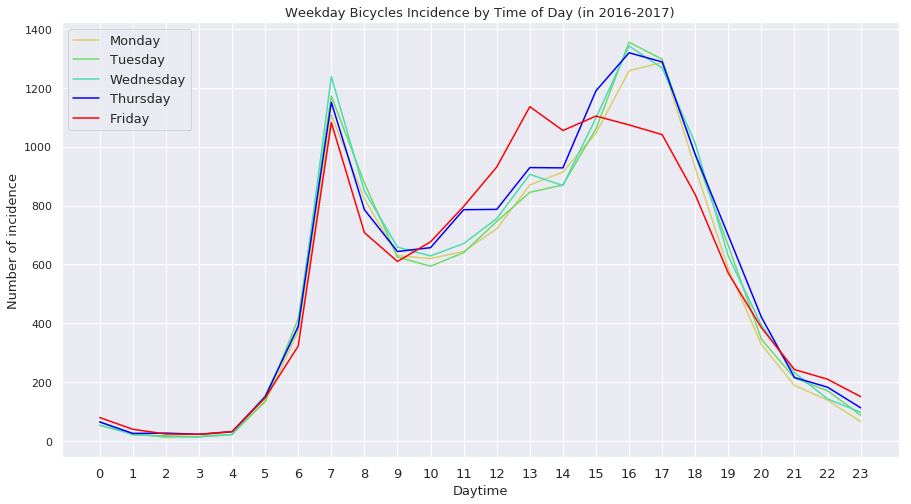

In [27]:
# Create line charts showing trends in the Time of Day and Number of incidence 
# Set x_axis

x_axis = incidence_by_hour_pivot.index

# Plot each weekday and assigning color to be consistent with previous charts
plt.figure(figsize=(15, 8))
plt.plot(x_axis, incidence_by_hour_pivot['Monday'], color='#DACF68')
plt.plot(x_axis, incidence_by_hour_pivot['Tuesday'], color='#6CDB69')
plt.plot(x_axis, incidence_by_hour_pivot['Wednesday'], color='#4CDCAE')
plt.plot(x_axis, incidence_by_hour_pivot['Thursday'], color='blue')
plt.plot(x_axis, incidence_by_hour_pivot['Friday'], color='red')

# Determine y-axis
y_max = 1300
step = 100

# Format axes ticks and labels
plt.xticks(np.arange(len(x_axis)), x_axis, fontsize=13)
#plt.yticks(y_axis, y_axis_fmt, fontsize=13)
plt.xlabel('Daytime', fontsize=13)
plt.ylabel('Number of incidence', fontsize=13)

plt.legend(fontsize=13, loc='upper left')
plt.title("Weekday Bicycles Incidence by Time of Day (in 2016-2017)", fontsize=13)
plt.savefig('2016-2017-weekday-incidence-by-hour.png')
plt.show()

## Per Weekends, Per Hour

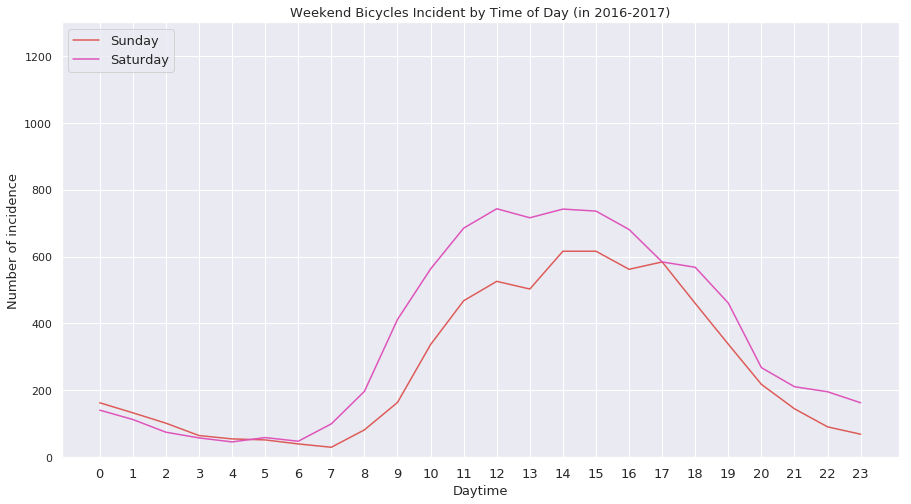

In [29]:
# Plot for Weekends
plt.figure(figsize=(15,8))
plt.plot(incidence_by_hour_pivot['Sunday'], color='#DD5B58')
plt.plot(incidence_by_hour_pivot['Saturday'], color='#DE54BB')

# Determine y-axis

y_axis = np.arange(0, y_max+step, step)
# format y-ticks as comma separated
y_axis_fmt = ["{:,.0f}".format(y) for y in y_axis]
#set y-axis limits
plt.ylim(min(y_axis), max(y_axis))

# Format axes ticks and labels
plt.xticks(np.arange(len(x_axis)), x_axis, fontsize=13)
#plt.yticks(y_axis, y_axis_fmt, fontsize=13)

plt.legend(fontsize=13, loc='upper left')
plt.title("Weekend Bicycles Incident by Time of Day (in 2016-2017)", fontsize=13)
plt.xlabel('Daytime', fontsize=13)
plt.ylabel('Number of incidence', fontsize=13)

plt.savefig('2014-weekend-incidence-by-hour.png')

plt.show()

## Per Time of Day

In [0]:
# define a function that turns the weekdays and weekendays
def days_group(UWOCHENTAG):
    if UWOCHENTAG >= 1 and UWOCHENTAG < 6:
        return "weekdays"
    else:
        return "weekends"

In [0]:
# define a function that turns the hours into daytime groups
def when_was_it(USTUNDE):
    if USTUNDE >= 5 and USTUNDE < 10:
        return "morning rush (5-10)"
    elif USTUNDE >= 10 and USTUNDE < 15:
        return "office hours (10-15)"
    elif USTUNDE >= 15 and USTUNDE < 19:
        return "afternoon rush (15-19)"
    elif USTUNDE >= 19 and USTUNDE < 23:
        return "evening (19-23)"
    else:
        return "night (23-5)"

In [32]:
# apply thus function to our temporary hour column
data['Daystype'] = data['UWOCHENTAG'].apply(days_group)
data[['UWOCHENTAG', 'Daystype']].head(8)

,UWOCHENTAG,Daystype
0,3,weekdays
1,7,weekends
2,5,weekdays
3,3,weekdays
4,5,weekdays
5,5,weekdays
6,6,weekends
7,2,weekdays


In [33]:
# apply thus function to our temporary hour column
data['Daytime'] = data['USTUNDE'].apply(when_was_it)
data[['USTUNDE', 'Daytime']].head(8)

,USTUNDE,Daytime
0,21,evening (19-23)
1,16,afternoon rush (15-19)
2,15,afternoon rush (15-19)
3,6,morning rush (5-10)
4,22,evening (19-23)
5,12,office hours (10-15)
6,10,office hours (10-15)
7,9,morning rush (5-10)


In [34]:
counts = data.groupby(['Daytime', 'Daystype']).size()
counts

Daytime                 Daystype
afternoon rush (15-19)  weekdays    20913
                        weekends     6625
evening (19-23)         weekdays     6343
                        weekends     2544
morning rush (5-10)     weekdays    13064
                        weekends     3686
night (23-5)            weekdays     1533
                        weekends      946
office hours (10-15)    weekdays    17831
                        weekends     8045
dtype: int64

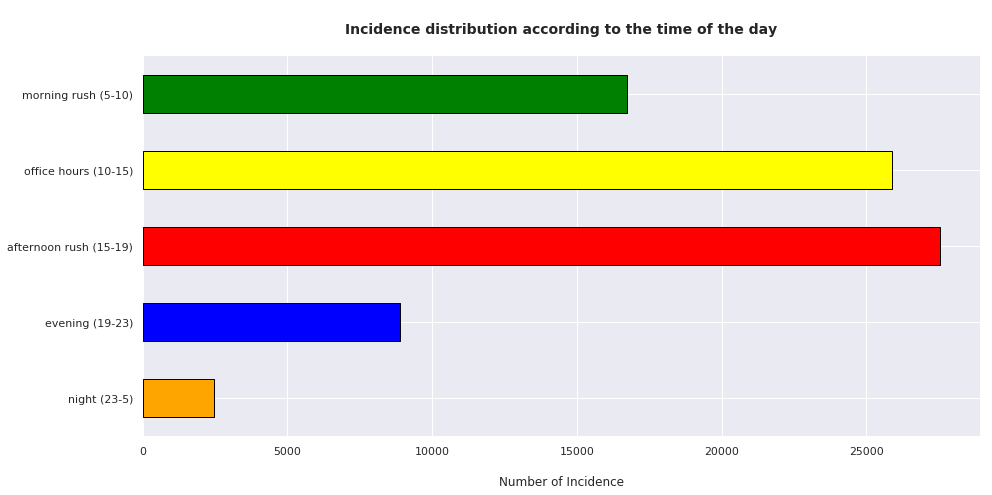

In [35]:

# prepare dataframe
order = ['night (23-5)', 'evening (19-23)', 'afternoon rush (15-19)', 'office hours (10-15)', 'morning rush (5-10)']
df_sub = data.groupby('Daytime').size().reindex(order)
#plt.figure(figsize=(12,8))

# prepare barplot
fig, ax = plt.subplots(figsize=(15, 7))
colors = ['orange', 'blue', 'red', 'yellow', 'green']

# plot
count=df_sub.plot(kind='barh', ax=ax, color=colors, edgecolor='black')
ax.set_title('\nIncidence distribution according to the time of the day\n', fontsize=14, fontweight='bold')
ax.set(xlabel='\nNumber of Incidence', ylabel='')


# remove all spines
sns.despine(top=True, right=True, left=True, bottom=True);

In [36]:
#counts = counts.rename_axis(['Daystype', 'Daytime'])
counts = counts.rename_axis(['Daytime', 'Daystype'])\
                                .unstack('Daystype')\
                                .rename({1:'weekdays', 2:'weekends'}, axis='columns')
counts

Daystype,weekdays,weekends
Daytime,,
afternoon rush (15-19),20913,6625
evening (19-23),6343,2544
morning rush (5-10),13064,3686
night (23-5),1533,946
office hours (10-15),17831,8045


## Per Time and Days Category

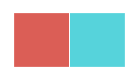

In [38]:
twoColorPalette = sns.color_palette('hls', 2)
two = sns.palplot(twoColorPalette)

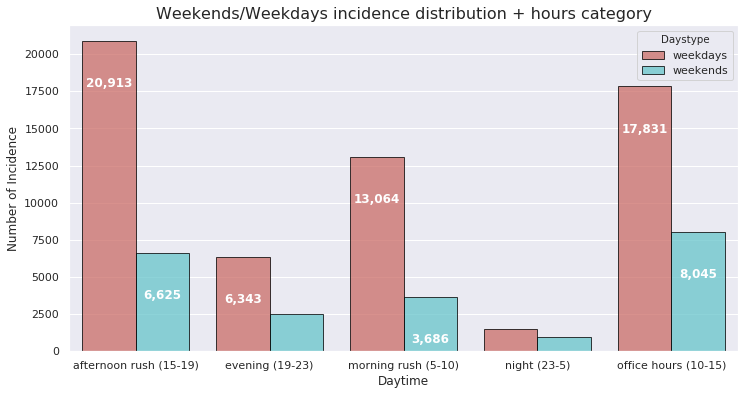

In [40]:
# create dataframe holding all data
import matplotlib.colors as colors
#colors=['orange', 'red']
accSevByDaysType_df = data[['Daystype', 'IstRad', 'Daytime']].copy()
#accSevByDaysType_df.index = accSevByDaysType_df['Daystype']
#accSevByDaysType_df['Daystype'] = accSevByDaysType_df.index.daystype
accSevByDaysType_df = pd.DataFrame(accSevByDaysType_df.\
                                groupby(['Daystype', 'Daytime']).\
                                count()['IstRad'])
accSevByDaysType_df.reset_index(inplace=True)
accSevByDaysType_df[['Daystype', 
                  'Daytime', 
                  'IstRad']]
accSevByDaysType_df.rename(columns={'IstRad':'Number of Incidence'}, 
                        inplace=True)

# add month length for normalization
#accSevByMonth_df['Month Length'] = tripleMonthLength_list

# normalize
#accSevByMonth_df['Incidence Count'] = accSevByMonth_df['Incidence Count']/accSevByMonth_df['Month Length']

# create bar plot
sns.set(rc={'figure.figsize':(12,6)})
incidenceSeverityByDaysType_plt = sns.barplot(x='Daytime', y='Number of Incidence', 
                                          data=accSevByDaysType_df, 
                                          hue='Daystype',
                                          palette=twoColorPalette,
                                          edgecolor='black', alpha=0.75, 
                                          linewidth=1)
plt.title("Weekends/Weekdays incidence distribution + hours category", size=16)
plt.ylabel("Number of Incidence")
#plt.savefig('weekends/weekdays incidence distribution.png')

ax = incidenceSeverityByDaysType_plt.axes
for p in ax.patches:
    ax.annotate(s="{:,.0f}".format(p.get_height()), xy=((p.get_x() + p.get_width() / 2., p.get_height()-3000)),
                ha='center', va='center', color='white', xytext=(0, 2), 
                textcoords='offset points', weight='bold', fontsize=12)  
    
plt.show(incidenceSeverityByDaysType_plt)

## 2.3 According to the type of the street

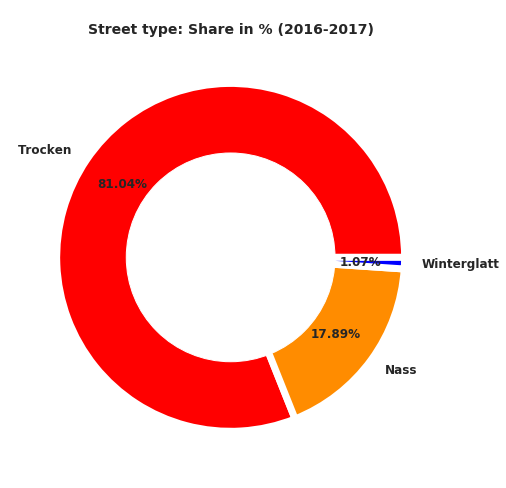

In [41]:
# assign the data
trocken   = data.STRZUSTAND.value_counts()[0.0]
nass = data.STRZUSTAND.value_counts()[1.0]
winterglatt  = data.STRZUSTAND.value_counts()[2.0]

names = ['Trocken','Nass', 'Winterglatt']
size  = [trocken, nass, winterglatt]
#explode = (0.2, 0, 0)

# create a pie chart
plt.pie(x=size, labels=names, colors=['red', 'darkorange', 'blue'],
        autopct='%1.2f%%', pctdistance=0.75, textprops=dict(fontweight='bold', fontsize=12),
        wedgeprops={'linewidth':7, 'edgecolor':'white'})

# create circle for the center of the plot to make the pie look like a donut
my_circle = plt.Circle((0,0), 0.6, color='white')

# plot the donut chart
fig = plt.gcf()
fig.set_size_inches(8,8)
fig.gca().add_artist(my_circle)
plt.title('\nStreet type: Share in % (2016-2017)', fontsize=14, fontweight='bold')
plt.show()

## 2.4 According to the type of the injuries



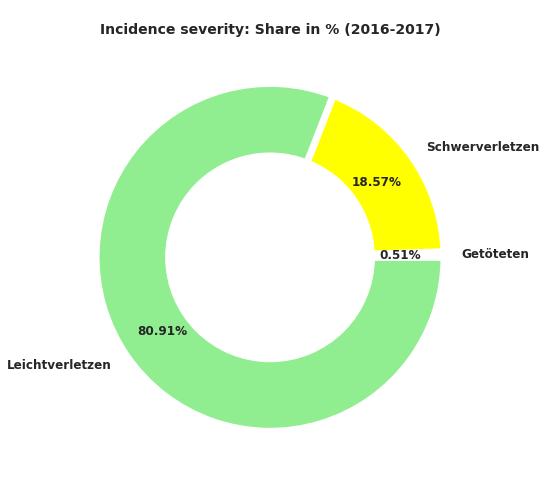

In [42]:
# assign the data
Getöteten   = data.UKATEGORIE.value_counts()[1]
Schwerverletzen = data.UKATEGORIE.value_counts()[2]
Leichtverletzen  = data.UKATEGORIE.value_counts()[3]

names = ['Getöteten','Schwerverletzen', 'Leichtverletzen']
size  = [Getöteten, Schwerverletzen, Leichtverletzen]
#explode = (0.2, 0, 0)

# create a pie chart
plt.pie(x=size, labels=names, colors=['green', 'yellow', 'lightgreen'], 
        autopct='%1.2f%%', pctdistance=0.75, textprops=dict(fontweight='bold',fontsize=12),
        wedgeprops={'linewidth':7, 'edgecolor':'white'})

# create circle for the center of the plot to make the pie look like a donut
my_circle = plt.Circle((0,0), 0.6, color='white')

# plot the donut chart
fig = plt.gcf()
fig.set_size_inches(8,8)
fig.gca().add_artist(my_circle)
plt.title('\nIncidence severity: Share in % (2016-2017)', fontsize=14, fontweight='bold')
plt.show()

## 2.6 Types of incidence ocurrance

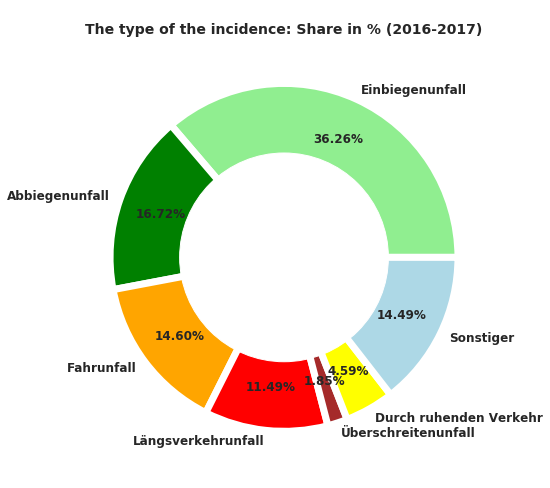

In [43]:
# assign the data
Einbiegenunfall  = data.UTYP.value_counts()[3]
Abbiegenunfall = data.UTYP.value_counts()[2]
Fahrunfall  = data.UTYP.value_counts()[1]
Längsverkehrunfall = data.UTYP.value_counts()[6]
Überschreitenunfall = data.UTYP.value_counts()[4]
Durch_ruhenden_Verkehr = data.UTYP.value_counts()[5]
Sonstiger = data.UTYP.value_counts()[7]



names = ['Einbiegenunfall','Abbiegenunfall', 'Fahrunfall', 'Längsverkehrunfall','Überschreitenunfall','Durch ruhenden Verkehr', 'Sonstiger']
size  = [Einbiegenunfall, Abbiegenunfall, Fahrunfall, Längsverkehrunfall, Überschreitenunfall, Durch_ruhenden_Verkehr, Sonstiger]
#explode = (0.2, 0, 0)

# create a pie chart
plt.pie(x=size, labels=names, colors=['lightgreen', 'green', 'orange', 'red', 'brown', 'yellow', 'lightblue'], 
        labeldistance=1.06, autopct='%1.2f%%', pctdistance=0.75, textprops=dict(fontweight='bold', fontsize=12),
        wedgeprops={'linewidth':7, 'edgecolor':'white'})

# create circle for the center of the plot to make the pie look like a donut
my_circle = plt.Circle((0,0), 0.6, color='white')

# plot the donut chart
fig = plt.gcf()
fig.set_size_inches(8,8)
fig.gca().add_artist(my_circle)
plt.title('\nThe type of the incidence: Share in % (2016-2017)', fontsize=14, fontweight='bold')
plt.show()

# B. Spatial Distribution of injuries and fatalities

# ###To Be replaced with Semi's cool Heat Map :D--?????


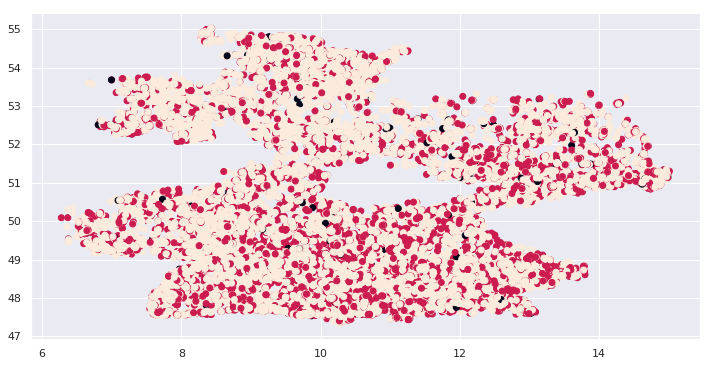

In [0]:
plt.scatter(data.LINREFX,data.LINREFY,c=data.UKATEGORIE)
#plt.figure(figsize=(12,6))

# 3. SPATIAL ANALYSIS AND INTERRELATIONS

## A) Interrelations to light conditions(type of light with regard to season)

In [0]:
# define a function that turns the hours into daytime groups
def is_season(UMONAT):
    if UMONAT >=3 and UMONAT < 6:
        return "spring"
    elif UMONAT >= 6 and UMONAT < 9:
        return "summer"
    elif UMONAT >= 9 and UMONAT < 12:
        return "automn"
    else:
        return "winter"

In [45]:
# apply thus function to our temporary hour column
data['Season'] = data['UMONAT'].apply(is_season)
data[['UMONAT', 'Season']].head(5)

,UMONAT,Season
0,7,summer
1,4,spring
2,9,automn
3,10,automn
4,8,summer


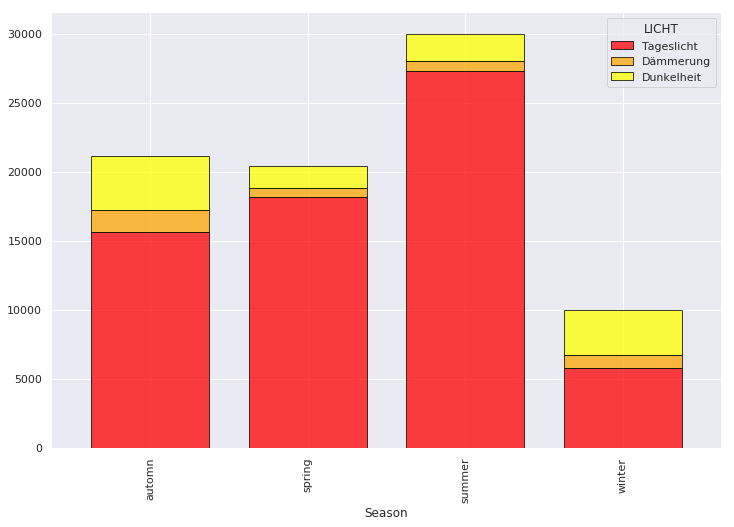

In [55]:
counts = data.groupby(['Season', 'LICHT']).size()

#distribution of incidents per year, per season
counts = counts.rename_axis(['Season', 'LICHT'])
counts = counts.rename_axis(['Season', 'LICHT'])\
                                .unstack('LICHT')\
                                .rename({0:'Tageslicht', 1:'Dämmerung', 2:'Dunkelheit' }, axis='columns')
counts
# prepare barplot
#fig, ax = plt.subplots(figsize=(12, 6))
colors= ["red", "orange","yellow", "green"]

# plot
counts.plot(kind='bar', stacked=True, color=colors, figsize=(12,8), width=0.75, align='center', linewidth=1, edgecolor='black', alpha=0.75)
ax.set_title('\nIncidence distribution by seasons, per type of the light\n', fontsize=14, fontweight='bold')
ax.set(xlabel='Percentage', ylabel='')
ax.legend(bbox_to_anchor=(1.25, 0.98), frameon=False)




# remove all spines
sns.despine(top=True, right=True, left=True, bottom=True);
#plot.bar(stacked=True, color=colors, figsize=(10,7))

## B) Interrelations to weather conditions